In [2]:
# imports

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [3]:
# read data into dataframe

lspi_jira_csv_file_path = Path('data/lspi-jira-ticket-data.csv')

lspi_jira_raw = pd.read_csv(lspi_jira_csv_file_path)
lspi_jira_raw = lspi_jira_raw.iloc[:, :49]

C:\Users\JennyXu\AppData\Local\Temp\ipykernel_8256\2003476494.py:5: DtypeWarning: Columns (22,27,28,29,30,31,34,35,36,39,40,44,50,51,53,54,55,56,57,60,62,63,64,65,66,68,69,70,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,193,194,195,196,197,198,199,213,214,215,218,219,220,224,234,235,237,269,270,314,316,317,318,319,384,385,386,387,388,389,390,391,393,396,428,439,440,441,442,443,444,445,446,447,448,505,529,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663) have mixed types. Specify dtype option on import or set low_memory=False.
  lspi_jira_raw = pd.read_csv(lspi_jira_csv_file_path)


In [4]:
lspi_jira_raw

,Created,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,...,Watchers,Watchers Id,Original estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level
0,6/23/2025 7:03,Existing LSPI User - Modify Access - Himanshu ...,S4-3391,238955,Service Request,In Progress,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/20/2025 7:14,PS4 100 Job Failure - LSPI_ATR_LOCKBOX_JPM,S4-3390,238935,Incident,Incident Resolved/Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/19/2025 16:19,Issue Initial Password for PS4 to Linda Neveu,S4-3389,238927,Service Request,Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/19/2025 16:18,Issue Initial Password for PS4 to Jeremy Carter,S4-3388,238926,Service Request,Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/19/2025 16:17,Issue Initial Password for PS4 to Tom Beauregard,S4-3387,238925,Service Request,Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,1/2/2024 9:12,Issue with Emailing/Viewing PO's in S/4,S4-1188,217493,Incident,Canceled,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2136,1/2/2024 8:49,SAP S4 BILLS,S4-1187,217487,Incident,Incident Resolved/Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2137,1/2/2024 6:40,Access to T codes in PS4 for KPI Monitoring,S4-1186,217471,Service Request,Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2138,1/2/2024 0:29,Delivery Output Cannot Be Print Previewed,S4-1185,217470,Enhancements,Closed,S4,SAP S/4,service_desk,Jeremy Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 1. Basic overview
print("=== DataFrame shape ===")
print(lspi_jira_raw.shape, "\n")

print("=== DataFrame info ===")
lspi_jira_raw.info()
print()

=== DataFrame shape ===
(2140, 49) 

=== DataFrame info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Created               2140 non-null   object 
 1   Summary               2140 non-null   object 
 2   Issue key             2140 non-null   object 
 3   Issue id              2140 non-null   int64  
 4   Issue Type            2140 non-null   object 
 5   Status                2140 non-null   object 
 6   Project key           2140 non-null   object 
 7   Project name          2140 non-null   object 
 8   Project type          2140 non-null   object 
 9   Project lead          2140 non-null   object 
 10  Project lead id       2140 non-null   object 
 11  Project description   0 non-null      float64
 12  Project url           0 non-null      float64
 13  Priority              2140 non-null   object 
 14  Resolution  

In [6]:
# --- Step 1: Select, Consolidate, and Clean Relevant Columns ---

def clean_description_text(text):
    """
    Cleans the raw description text by removing Jira markup, email artifacts,
    form field labels, and other noise, while preserving apostrophes.
    """
    if not isinstance(text, str):
        return ""

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove forwarded email chains and headers
    lines = text.split('\n')
    clean_lines = []
    in_forwarded_section = False
    for line in lines:
        if re.match(r'^\s*_{5,}\s*$', line) or re.match(r'^\s*from:\s*', line):
            in_forwarded_section = True
            continue
        if re.match(r'^\s*sent:\s*|^\s*to:\s*|^\s*subject:\s*', line):
            continue
        if 'begin forwarded message' in line:
            in_forwarded_section = True
            continue
        if not in_forwarded_section:
            clean_lines.append(line)
    text = '\n'.join(clean_lines)

    # 3. Remove Jira/Confluence specific markup
    text = re.sub(r'\[([^|\]]+)\|[^\]]+\]', r' \1 ', text)
    text = re.sub(r'!(\{{0,1}[^!|]+?){0,1}!', ' ', text)
    text = re.sub(r'\[~accountid:[^\]]+\]', ' ', text)
    text = re.sub(r'\{[a-z]+[^}]*\}', ' ', text)

    # 4. Remove structured form field names and table pipes
    text = re.sub(r'\|', ' ', text)
    text = re.sub(r'\s*\*[^*]+\*\s*', ' ', text)

    # 5. Remove general noise (URLs, emails, signatures)
    text = re.sub(r'https?://\S+', ' ', text)
    text = re.sub(r'\S+@\S+\.\S+', ' ', text)
    text = re.sub(r'(?i)\b(regards|best regards|sincerely|cheers|thank you|thanks|hello team|kpmg team)\b.*', '', text, flags=re.DOTALL)

    # 6. Final cleanup of special characters and whitespace
    # Remove unicode artifacts
    text = re.sub(r'[â€œ”ï»¿]', ' ', text)
    
    # ** MODIFIED STEP: Keep letters, numbers, spaces, AND apostrophes **
    text = re.sub(r"[^a-z0-9\s']", ' ', text)
    
    # Explicitly replace all newline characters with a space
    text = text.replace('\n', ' ')
    
    # Normalize all other whitespace (multiple spaces, tabs) into a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# --- Apply the Cleaning and Consolidation ---

# Create a new DataFrame with only the columns needed
cols_to_keep = ['Description', 'Issue Type'] + \
               [col for col in lspi_jira_raw.columns if col.startswith('Components')] + \
               [col for col in lspi_jira_raw.columns if col.startswith('Labels')]
lspi_jira_model_data = lspi_jira_raw[cols_to_keep].copy()

# Define the consolidation function
def consolidate_columns(df, prefix):
    cols = [col for col in df.columns if col.startswith(prefix)]
    if not cols: return None
    consolidated_series = df[cols].apply(
        lambda row: ','.join(sorted(set(str(v).strip() for v in row if pd.notna(v) and str(v).strip() != ''))),
        axis=1
    )
    return consolidated_series

# Consolidate 'Components' and 'Labels'
lspi_jira_model_data['Components'] = consolidate_columns(lspi_jira_model_data, 'Components')
lspi_jira_model_data['Labels'] = consolidate_columns(lspi_jira_model_data, 'Labels')

# Drop the original duplicated columns
cols_to_drop = [col for col in lspi_jira_model_data.columns if '.' in col]
lspi_jira_model_data.drop(columns=cols_to_drop, inplace=True)

# Apply the new advanced cleaning function to the 'Description' column
lspi_jira_model_data['Description_Clean'] = lspi_jira_model_data['Description'].apply(clean_description_text)

# Clean other columns
lspi_jira_model_data['Issue Type'] = lspi_jira_model_data['Issue Type'].str.lower().str.strip().fillna('unknown')
lspi_jira_model_data['Labels'] = lspi_jira_model_data['Labels'].str.lower().replace('', 'no_label')
lspi_jira_model_data['Components'] = lspi_jira_model_data['Components'].str.lower().replace('', 'uncategorized')

# --- Display the results ---
print("--- Comparison of Original vs. Cleaned Descriptions (with Apostrophe Fix) ---")
# To make it easier to read in the output, we'll set a display option
pd.set_option('display.max_colwidth', 300)
print(lspi_jira_model_data[['Description', 'Description_Clean']])
lspi_jira_model_data['Description'] = lspi_jira_model_data['Description_Clean']

--- Comparison of Original vs. Cleaned Descriptions (with Apostrophe Fix) ---
                                                                                                                                                                                                                                                                                                      Description  \
0     | \n|Manager's Info | \n|  *Manager's Name* | \n| | Jeremy Carter | \n|  *Manager's Email* | \n| | [jeremy.carter@liquidpower.com|mailto:jeremy.carter@liquidpower.com] | \n|User's Info | \n|  *User ID* | \n| | HIMA | \n|  *Name* | \n| | Himanshu Mahajan | \n|  *Email* | \n| | [himanshu.mahajan@l...   
1     Hello Team,\n\nJob LSPI_ATR_LOCKBOX_JPM failed on June 19, 2025 in PS4 100, Please check\n\n!{6E927572-EF3D-4DC2-8108-AC5977AD576F}-20250620-121431.png|width=1719,height=537,alt="{6E927572-EF3D-4DC2-8108-AC5977AD576F}-20250620-121431.png"!\n\n!{C31C7FC0-4F4A-4375-A4FF-6F9F3C147697}-20250620-1215..

In [7]:
lspi_jira_model_data

,Description,Issue Type,Components,Labels,Description_Clean
0,manager's info jeremy carter user's info hima himanshu mahajan add change access get access to data for views v coep view and v coep r3 in ds4 qs4 and ps4 for application access if user information is known please list below to help expedite process 06 24 2025 requesters information himanshu mah...,service request,security,security,manager's info jeremy carter user's info hima himanshu mahajan add change access get access to data for views v coep view and v coep r3 in ds4 qs4 and ps4 for application access if user information is known please list below to help expedite process 06 24 2025 requesters information himanshu mah...
1,,incident,atr,bugfix,
2,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for line in ps4 and send it to her by secure email,service request,security,no_label,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for line in ps4 and send it to her by secure email
3,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for jectr in ps4 and send it to him by secure email,service request,security,no_label,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for jectr in ps4 and send it to him by secure email
4,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for tobe in ps4 and send it to him by secure email,service request,security,no_label,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for tobe in ps4 and send it to him by secure email
...,...,...,...,...,...
2135,i m trying to get a couple of po s to email to me or to even view the print preview to save that way and nothing is working i ve tried using both the external email and internal email options within the po and neither have worked i ve checked my inbox in s 4 to see if they went there and there i...,incident,"stp,security",no_label,i m trying to get a couple of po s to email to me or to even view the print preview to save that way and nothing is working i ve tried using both the external email and internal email options within the po and neither have worked i ve checked my inbox in s 4 to see if they went there and there i...
2136,morning can not print bills after creating deliveries or trying to reprint bills,incident,otc,no_label,morning can not print bills after creating deliveries or trying to reprint bills
2137,hello requetsing your approval for access to below t codes in ps4 for reena neeranjane for kpi monitoring,service request,security,no_label,hello requetsing your approval for access to below t codes in ps4 for reena neeranjane for kpi monitoring
2138,it is not possible to print preview delivery output e g z515 bol please see deliveries 86000271 and 86000277 as examples,enhancements,otc,no_label,it is not possible to print preview delivery output e g z515 bol please see deliveries 86000271 and 86000277 as examples


          EXPLORATORY DATA ANALYSIS RESULTS           

--- EDA Part 1: Predicting `Issue Type` and `Labels` from `Description` ---


--- 1.1: Distribution of `Issue Type` (First Target) ---
Issue Type
service request    1192
incident            497
enhancements        365
question             59
it task              26
change                1
Name: count, dtype: int64


C:\Users\JennyXu\AppData\Local\Temp\ipykernel_8256\278420114.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=lspi_jira_model_data['Issue Type'], order=issue_type_counts.index, palette='crest')


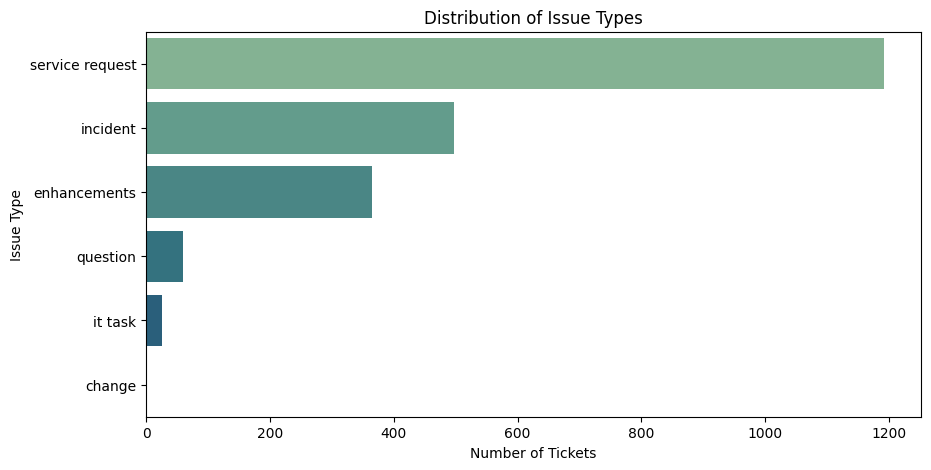

C:\Users\JennyXu\AppData\Local\Temp\ipykernel_8256\278420114.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_counts_df, x='Count', y='Label', palette='flare', orient='h')



--- 1.2: Distribution of `Labels` (First Target) ---
Top 15 Most Common Labels:
no_label          1024
security           393
bugfix             193
servicerequest     153
incident            99
gcan                65
enhancement         61
configuration       40
future_sprint       21
sap                 21
update/upgrade      18
ffid                17
2024_sprint_1       14
reporting           14
wricef              13
dtype: int64


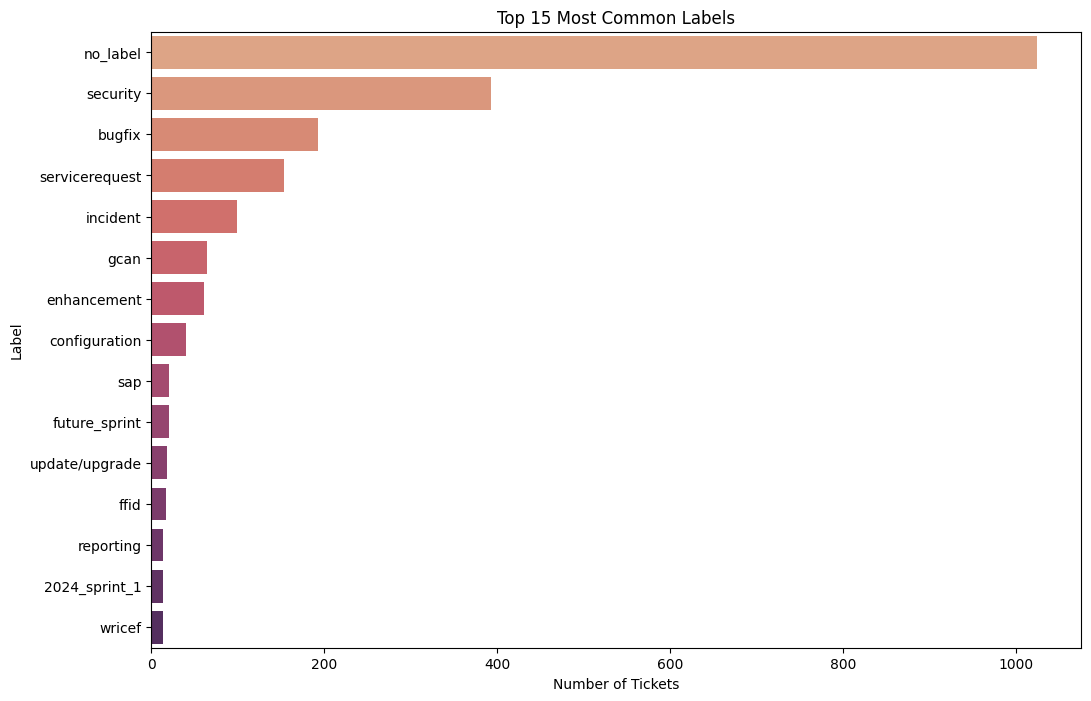


--- EDA Part 2: Predicting `Components` from `Issue Type` and `Labels` ---


--- 2.1: Distribution of `Components` (Final Target) ---
Top 15 Most Common Components:
security       967
otc            403
atr            359
basis          335
stp            222
development     74
pti-pm          65
pti             35
otc-ehs         30
ats              3
dtype: int64


C:\Users\JennyXu\AppData\Local\Temp\ipykernel_8256\278420114.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=component_counts_df, x='Count', y='Component', palette='mako', orient='h')


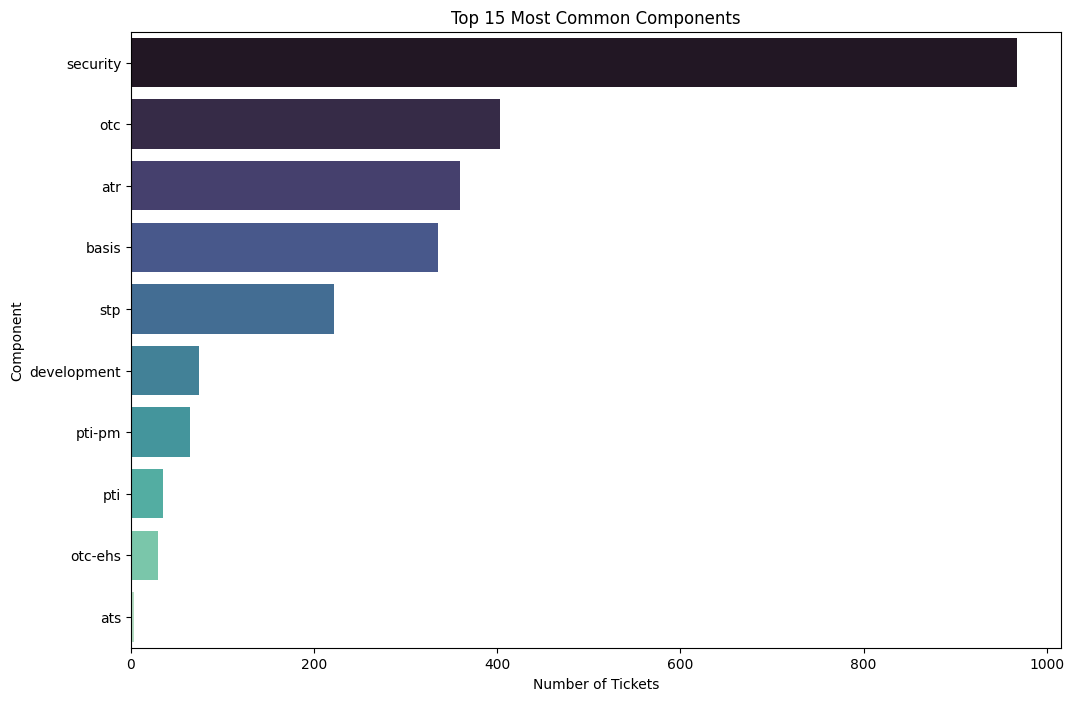


--- 2.2: Relationship between `Issue Type` and `Components` ---
Crosstab of Components vs. Issue Type:
Issue Type   change  enhancements  incident  it task  question  \
Component                                                        
atr               0            96       144        1         6   
ats               0             0         3        0         0   
basis             1            55       106       25         2   
development       0            43        22        1         1   
otc               0           145       149        0        37   
otc-ehs           0            13         9        0         2   
pti               0            11         5        0         1   
pti-pm            0            23        10        0         2   
security          0             9        84        1         4   
stp               0            74        85        1         9   

Issue Type   service request  
Component                     
atr                      112  
ats       

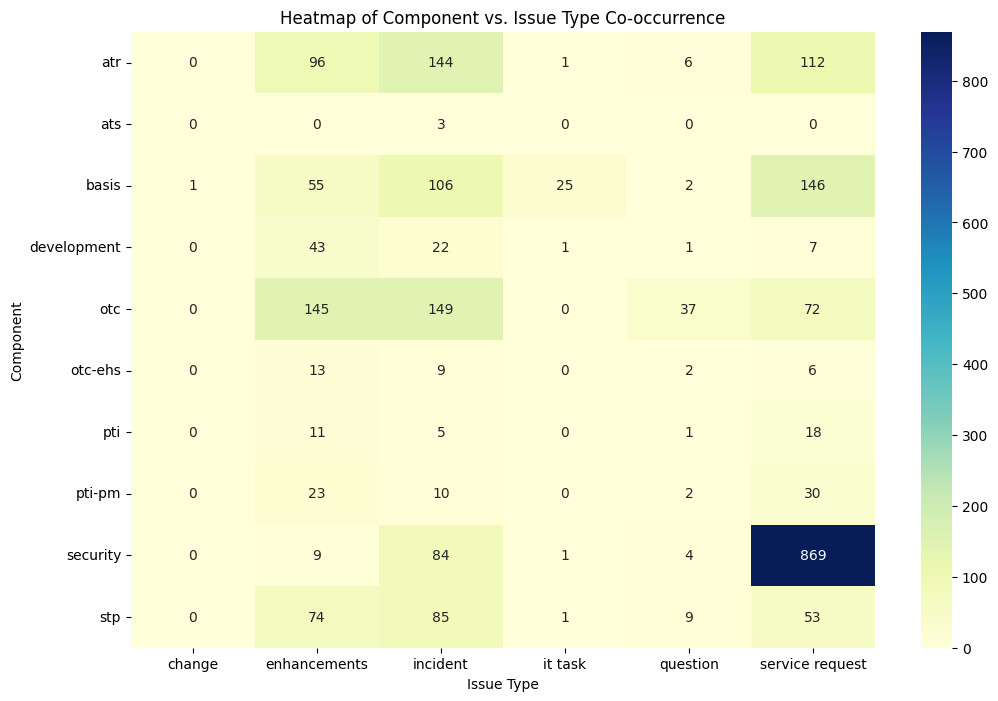

In [8]:
# --- Step 2: Exploratory Data Analysis (EDA) ---

print("======================================================")
print("          EXPLORATORY DATA ANALYSIS RESULTS           ")
print("======================================================")

# Add description length for EDA plots
lspi_jira_model_data['description_length'] = lspi_jira_model_data['Description'].str.len()

# --- PART 1: EDA for `Description` -> `Issue Type` & `Labels` ---
print("\n--- EDA Part 1: Predicting `Issue Type` and `Labels` from `Description` ---\n")

# 1.1: Analyze `Issue Type` Distribution
print("\n--- 1.1: Distribution of `Issue Type` (First Target) ---")
issue_type_counts = lspi_jira_model_data['Issue Type'].value_counts()
print(issue_type_counts)
plt.figure(figsize=(10, 5))
sns.countplot(y=lspi_jira_model_data['Issue Type'], order=issue_type_counts.index, palette='crest')
plt.title('Distribution of Issue Types')
plt.xlabel('Number of Tickets')
plt.show()

# 1.2: Analyze `Labels` Distribution (as a multi-label problem)
print("\n--- 1.2: Distribution of `Labels` (First Target) ---")
# Split the labels string and count each one
all_labels = [label for sublist in lspi_jira_model_data['Labels'].str.split(',') for label in sublist if label]
label_counts = Counter(all_labels)
print("Top 15 Most Common Labels:")
print(pd.Series(label_counts).sort_values(ascending=False).head(15))
label_counts_df = pd.DataFrame(label_counts.most_common(15), columns=['Label', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(data=label_counts_df, x='Count', y='Label', palette='flare', orient='h')
plt.title('Top 15 Most Common Labels')
plt.xlabel('Number of Tickets')
plt.show()


# --- PART 2: EDA for (`Description`, `Issue Type`, `Labels`) -> `Components` ---
print("\n--- EDA Part 2: Predicting `Components` from `Issue Type` and `Labels` ---\n")

# 2.1: Analyze `Components` Distribution (Final Target)
print("\n--- 2.1: Distribution of `Components` (Final Target) ---")
all_components = [comp for sublist in lspi_jira_model_data['Components'].str.split(',') for comp in sublist if comp]
component_counts = Counter(all_components)
print("Top 15 Most Common Components:")
print(pd.Series(component_counts).sort_values(ascending=False).head(15))
component_counts_df = pd.DataFrame(component_counts.most_common(15), columns=['Component', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(data=component_counts_df, x='Count', y='Component', palette='mako', orient='h')
plt.title('Top 15 Most Common Components')
plt.xlabel('Number of Tickets')
plt.show()

# 2.2: Relationship between `Issue Type` and `Components`
print("\n--- 2.2: Relationship between `Issue Type` and `Components` ---")
# Create a dataframe for co-occurrence analysis
it_comp_list = []
for index, row in lspi_jira_model_data.iterrows():
    issue_type = row['Issue Type']
    components = row['Components'].split(',')
    for comp in components:
        if comp:
            it_comp_list.append({'Issue Type': issue_type, 'Component': comp})
it_comp_df = pd.DataFrame(it_comp_list)
crosstab_it_comp = pd.crosstab(it_comp_df['Component'], it_comp_df['Issue Type'])
print("Crosstab of Components vs. Issue Type:")
print(crosstab_it_comp)
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_it_comp, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Component vs. Issue Type Co-occurrence')
plt.show()

--- Analysis 1: Issue Type vs. Individual Components ---

Pivot Table: Issue Type vs. Components
Issue Type   change  enhancements  incident  it task  question  \
Components                                                       
atr               0            96       144        1         6   
ats               0             0         3        0         0   
basis             1            55       106       25         2   
development       0            43        22        1         1   
otc               0           145       149        0        37   
otc-ehs           0            13         9        0         2   
pti               0            11         5        0         1   
pti-pm            0            23        10        0         2   
security          0             9        84        1         4   
stp               0            74        85        1         9   

Issue Type   service request  
Components                    
atr                      112  
ats              

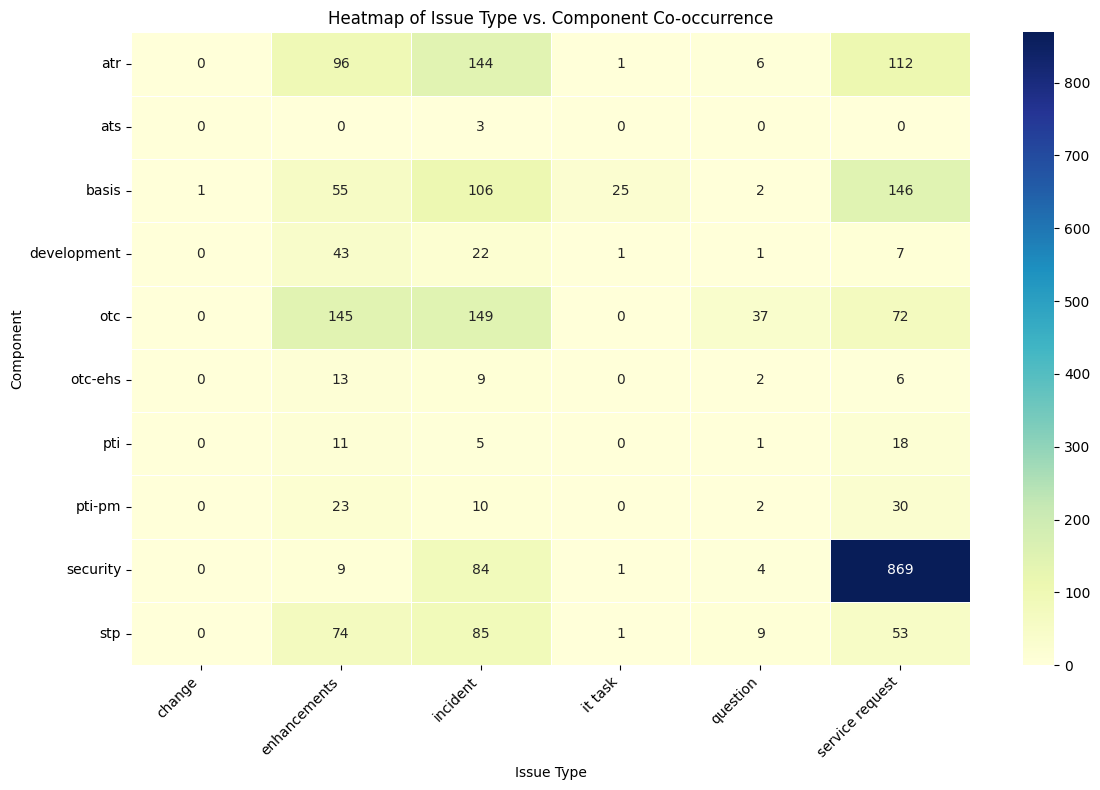


------------------------------------------------------------

--- Analysis 2: Individual Labels vs. Individual Components ---

Pivot Table: Labels vs. Components
Labels       2024_sprint_1  2024_sprint_2  2024_sprint_3  2024_sprint_4  \
Components                                                                
atr                      2              2              1              2   
ats                      0              0              0              0   
basis                    4              0              0              0   
development              0              0              0              0   
otc                      5              2              7              1   
otc-ehs                  0              0              0              0   
pti                      0              0              0              0   
pti-pm                   1              0              0              0   
security                 0              0              0              0   
stp         

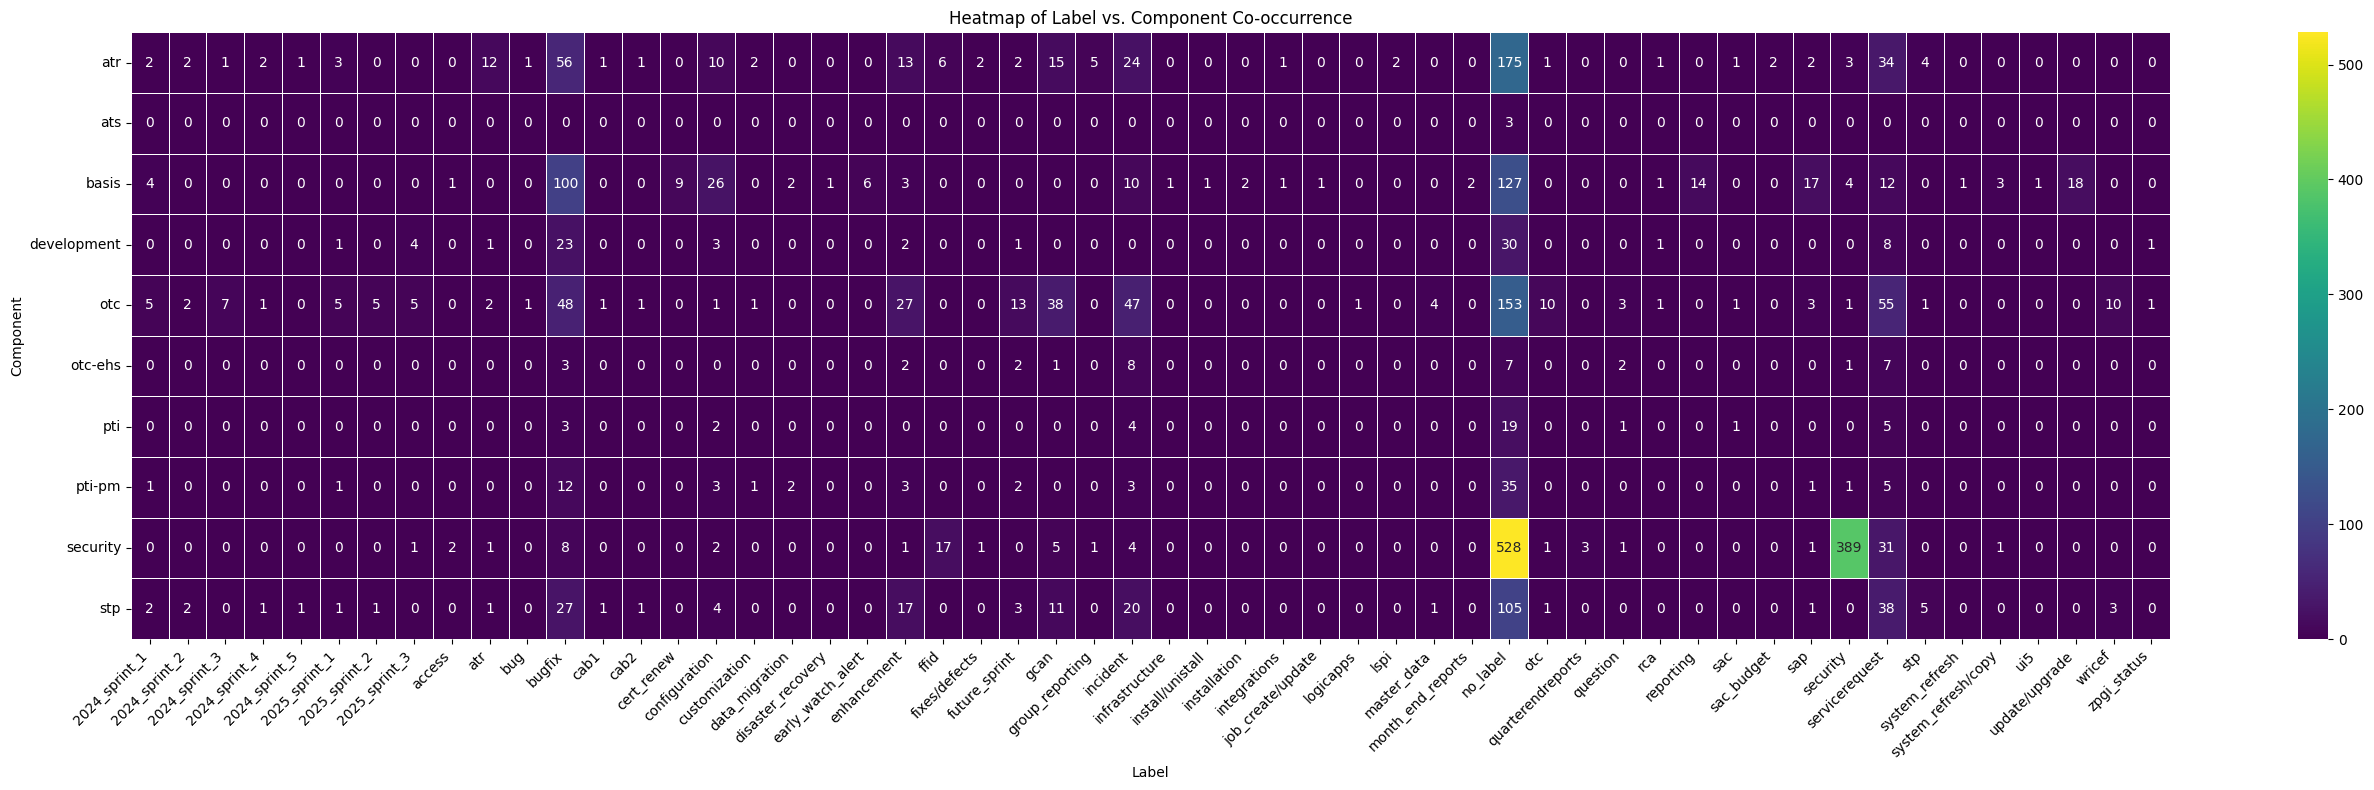

In [9]:
# --- Pivot Table 1: Issue Type vs. Individual Components ---

print("--- Analysis 1: Issue Type vs. Individual Components ---")

# 1. Create a working copy with the relevant columns
it_vs_comp_df = lspi_jira_model_data[['Issue Type', 'Components']].copy()

# 2. Split the comma-separated 'Components' string into a list of strings
it_vs_comp_df['Components'] = it_vs_comp_df['Components'].str.split(',')

# 3. Explode the DataFrame on the 'Components' column
# This creates a new row for each component in the list
it_vs_comp_df_exploded = it_vs_comp_df.explode('Components')

# 4. Clean up any leading/trailing whitespace and filter out empty strings
it_vs_comp_df_exploded['Components'] = it_vs_comp_df_exploded['Components'].str.strip()
it_vs_comp_df_exploded = it_vs_comp_df_exploded[it_vs_comp_df_exploded['Components'] != '']

# 5. Create the pivot table using crosstab
issue_type_component_pivot = pd.crosstab(
    index=it_vs_comp_df_exploded['Components'],
    columns=it_vs_comp_df_exploded['Issue Type']
)

print("\nPivot Table: Issue Type vs. Components")
print(issue_type_component_pivot)

# 6. Visualize the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(issue_type_component_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Issue Type vs. Component Co-occurrence')
plt.xlabel('Issue Type')
plt.ylabel('Component')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# --- Pivot Table 2: Individual Labels vs. Individual Components ---

print("\n" + "-"*60)
print("\n--- Analysis 2: Individual Labels vs. Individual Components ---")

# 1. Create a working copy with the relevant columns
labels_vs_comp_df = lspi_jira_model_data[['Labels', 'Components']].copy()

# 2. Split both 'Labels' and 'Components' columns into lists
labels_vs_comp_df['Labels'] = labels_vs_comp_df['Labels'].str.split(',')
labels_vs_comp_df['Components'] = labels_vs_comp_df['Components'].str.split(',')

# 3. Explode the DataFrame twice: first by Components, then by Labels
df_exploded_comp = labels_vs_comp_df.explode('Components')
df_fully_exploded = df_exploded_comp.explode('Labels')

# 4. Clean up whitespace and filter out empty strings for both columns
df_fully_exploded['Components'] = df_fully_exploded['Components'].str.strip()
df_fully_exploded['Labels'] = df_fully_exploded['Labels'].str.strip()
df_fully_exploded = df_fully_exploded[
    (df_fully_exploded['Components'] != '') & (df_fully_exploded['Labels'] != '')
]

# 5. Create the pivot table using crosstab
label_component_pivot = pd.crosstab(
    index=df_fully_exploded['Components'],
    columns=df_fully_exploded['Labels']
)

print("\nPivot Table: Labels vs. Components")
# If the table is very large, you might want to view only the most frequent ones
# For now, we will print the whole table as requested
print(label_component_pivot)

# 6. Visualize the pivot table as a heatmap
# This can get very large. We'll plot it, but be aware it may be dense.
if not label_component_pivot.empty:
    # Dynamically adjust figure size based on the number of labels/components
    fig_width = max(12, len(label_component_pivot.columns) * 0.5)
    fig_height = max(8, len(label_component_pivot.index) * 0.4)
    
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(label_component_pivot, annot=True, fmt='d', cmap='viridis', linewidths=.5)
    plt.title('Heatmap of Label vs. Component Co-occurrence')
    plt.xlabel('Label')
    plt.ylabel('Component')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo co-occurrences found between Labels and Components to plot.")

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

In [10]:
# --- Analysis 1: Top 2 Components for each Issue Type ---

print("--- Top 2 Most Common Components for each Issue Type ---")

# Prepare the data by exploding 'Components'
it_vs_comp_df = lspi_jira_model_data[['Issue Type', 'Components']].copy()
it_vs_comp_df['Components'] = it_vs_comp_df['Components'].str.split(',')
it_vs_comp_df_exploded = it_vs_comp_df.explode('Components')
it_vs_comp_df_exploded['Components'] = it_vs_comp_df_exploded['Components'].str.strip()
it_vs_comp_df_exploded = it_vs_comp_df_exploded[it_vs_comp_df_exploded['Components'] != '']

# Group by Issue Type, count component occurrences, then get the top 2 for each group
top_components_by_issue_type = it_vs_comp_df_exploded.groupby('Issue Type')['Components'] \
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .head(2) \
    .to_frame(name='Count')

if not top_components_by_issue_type.empty:
    print(top_components_by_issue_type)
else:
    print("No component data found for issue types.")


# --- Analysis 2: Top 2 Components for each Label ---

print("\n" + "-"*60)
print("\n--- Top 2 Most Common Components for each Label ---")

# Prepare the data by exploding both 'Labels' and 'Components'
labels_vs_comp_df = lspi_jira_model_data[['Labels', 'Components']].copy()
labels_vs_comp_df['Labels'] = labels_vs_comp_df['Labels'].str.split(',')
labels_vs_comp_df['Components'] = labels_vs_comp_df['Components'].str.split(',')
df_exploded_comp = labels_vs_comp_df.explode('Components')
df_fully_exploded = df_exploded_comp.explode('Labels')

# Clean up whitespace and filter out empty strings
df_fully_exploded['Components'] = df_fully_exploded['Components'].str.strip()
df_fully_exploded['Labels'] = df_fully_exploded['Labels'].str.strip()
df_fully_exploded = df_fully_exploded[
    (df_fully_exploded['Components'] != '') & (df_fully_exploded['Labels'] != '')
]

# Group by Label, count component occurrences, then get the top 2 for each group
top_components_by_label = df_fully_exploded.groupby('Labels')['Components'] \
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .head(2) \
    .to_frame(name='Count')

if not top_components_by_label.empty:
    print(top_components_by_label)
else:
    print("No component data found for labels.")

print("\n" + "="*80)

--- Top 2 Most Common Components for each Issue Type ---
                            Count
Issue Type      Components       
change          basis           1
enhancements    otc           145
                atr            96
incident        otc           149
                atr           144
it task         basis          25
                atr             1
question        otc            37
                stp             9
service request security      869
                basis         146

------------------------------------------------------------

--- Top 2 Most Common Components for each Label ---
                            Count
Labels         Components        
2024_sprint_1  otc              5
               basis            4
2024_sprint_2  atr              2
               otc              2
2024_sprint_3  otc              7
...                           ...
update/upgrade basis           18
wricef         otc             10
               stp              3
zpgi_status 

In [13]:
# --- 1. Analysis for Issue Type ---
print("\n--- Most Common Component per Issue Type ---")

# First, we need to explode the dataframe to handle multi-value components
it_vs_comp_df = lspi_jira_model_data[['Issue Type', 'Components']].copy()
it_vs_comp_df['Components'] = it_vs_comp_df['Components'].str.split(',')
it_vs_comp_df_exploded = it_vs_comp_df.explode('Components').dropna()
it_vs_comp_df_exploded['Components'] = it_vs_comp_df_exploded['Components'].str.strip()
it_vs_comp_df_exploded = it_vs_comp_df_exploded[it_vs_comp_df_exploded['Components'] != '']


# Create the crosstab on the exploded data
crosstab_it = pd.crosstab(it_vs_comp_df_exploded['Issue Type'], it_vs_comp_df_exploded['Components'])

# Find the component with the maximum count for each issue type
primary_component_by_it = crosstab_it.idxmax(axis=1)

# Create the detailed report
report_it = pd.DataFrame({
    'Most Common Component': primary_component_by_it,
    'Count for Component': crosstab_it.max(axis=1),
    'Total Component Assignments': crosstab_it.sum(axis=1)
})

# Calculate the dominance percentage
report_it['Dominance (%)'] = round(
    100 * report_it['Count for Component'] / report_it['Total Component Assignments'], 1
)

# Sort for readability
report_it.sort_values('Total Component Assignments', ascending=False, inplace=True)

print(report_it)
print("\n* 'Dominance (%)' shows how often a ticket of a certain Issue Type is assigned to its most common Component.")



--- Most Common Component per Issue Type ---
                Most Common Component  Count for Component  \
Issue Type                                                   
service request              security                  869   
incident                          otc                  149   
enhancements                      otc                  145   
question                          otc                   37   
it task                         basis                   25   
change                          basis                    1   

                 Total Component Assignments  Dominance (%)  
Issue Type                                                   
service request                         1313           66.2  
incident                                 617           24.1  
enhancements                             469           30.9  
question                                  64           57.8  
it task                                   29           86.2  
change                 

In [25]:
# --- 1. Analysis for Labels ---
print("\n--- Most Common Component per Label ---")

# First, we need to explode the dataframe to handle multi-value components
it_vs_comp_df = lspi_jira_model_data[['Labels', 'Components']].copy()
it_vs_comp_df['Components'] = it_vs_comp_df['Components'].str.split(',')
it_vs_comp_df_exploded = it_vs_comp_df.explode('Components').dropna()
it_vs_comp_df_exploded['Components'] = it_vs_comp_df_exploded['Components'].str.strip()
it_vs_comp_df_exploded = it_vs_comp_df_exploded[it_vs_comp_df_exploded['Components'] != '']


# Create the crosstab on the exploded data
crosstab_it = pd.crosstab(it_vs_comp_df_exploded['Labels'], it_vs_comp_df_exploded['Components'])

# Find the component with the maximum count for each issue type
primary_component_by_it = crosstab_it.idxmax(axis=1)

# Create the detailed report
report_it = pd.DataFrame({
    'Most Common Component': primary_component_by_it,
    'Count for Component': crosstab_it.max(axis=1),
    'Total Component Assignments': crosstab_it.sum(axis=1)
})

# Calculate the dominance percentage
report_it['Dominance (%)'] = round(
    100 * report_it['Count for Component'] / report_it['Total Component Assignments'], 1
)

# Sort for readability
report_it.sort_values('Total Component Assignments', ascending=False, inplace=True)

print(report_it)
print("\n* 'Dominance (%)' shows how often a ticket of a certain Label is assigned to its most common Component.")


--- Most Common Component per Label ---
                   Most Common Component  Count for Component  \
Labels                                                          
no_label                        security                  528   
security                        security                  363   
bugfix                             basis                   80   
servicerequest                       otc                   50   
incident                             otc                   41   
...                                  ...                  ...   
job_create/update                  basis                    1   
sap,update/upgrade                 basis                    1   
question,security               security                    1   
stp,servicerequest                   stp                    1   
system_refresh                     basis                    1   

                    Total Component Assignments  Dominance (%)  
Labels                                          

In [29]:
lspi_jira_model_data

,Description,Issue Type,Components,Labels,Description_Clean,description_length
0,manager's info jeremy carter user's info hima himanshu mahajan add change access get access to data for views v coep view and v coep r3 in ds4 qs4 and ps4 for application access if user information is known please list below to help expedite process 06 24 2025 requesters information himanshu mah...,service request,security,security,manager's info jeremy carter user's info hima himanshu mahajan add change access get access to data for views v coep view and v coep r3 in ds4 qs4 and ps4 for application access if user information is known please list below to help expedite process 06 24 2025 requesters information himanshu mah...,313
1,,incident,atr,bugfix,,0
2,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for line in ps4 and send it to her by secure email,service request,security,no_label,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for line in ps4 and send it to her by secure email,194
3,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for jectr in ps4 and send it to him by secure email,service request,security,no_label,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for jectr in ps4 and send it to him by secure email,195
4,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for tobe in ps4 and send it to him by secure email,service request,security,no_label,as single sign on will not be in use during the disaster recovery test password authentication will be used please generate an initial password for tobe in ps4 and send it to him by secure email,194
...,...,...,...,...,...,...
2135,i m trying to get a couple of po s to email to me or to even view the print preview to save that way and nothing is working i ve tried using both the external email and internal email options within the po and neither have worked i ve checked my inbox in s 4 to see if they went there and there i...,incident,"stp,security",no_label,i m trying to get a couple of po s to email to me or to even view the print preview to save that way and nothing is working i ve tried using both the external email and internal email options within the po and neither have worked i ve checked my inbox in s 4 to see if they went there and there i...,445
2136,morning can not print bills after creating deliveries or trying to reprint bills,incident,otc,no_label,morning can not print bills after creating deliveries or trying to reprint bills,80
2137,hello requetsing your approval for access to below t codes in ps4 for reena neeranjane for kpi monitoring,service request,security,no_label,hello requetsing your approval for access to below t codes in ps4 for reena neeranjane for kpi monitoring,105
2138,it is not possible to print preview delivery output e g z515 bol please see deliveries 86000271 and 86000277 as examples,enhancements,otc,no_label,it is not possible to print preview delivery output e g z515 bol please see deliveries 86000271 and 86000277 as examples,120
